Original shape of data: (70000, 784)


d:\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2897: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
d:\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2898: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]


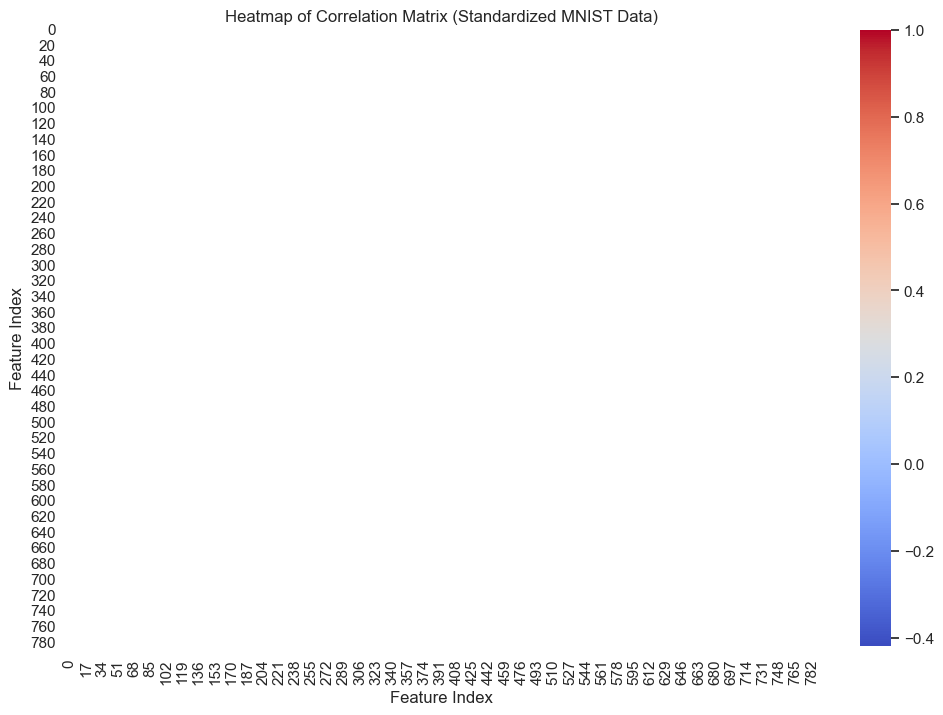

Explained variance ratio (PCA): [0.06194208 0.04905716]


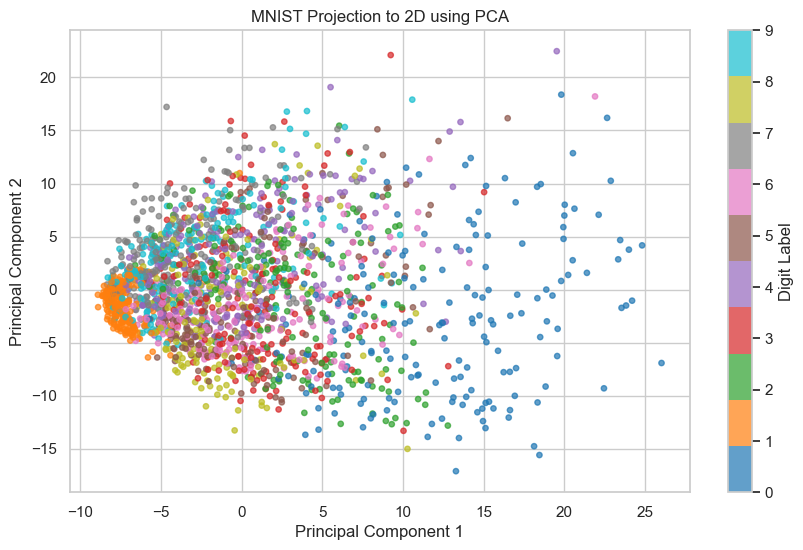

d:\anaconda3\Lib\site-packages\sklearn\manifold\_t_sne.py:1164: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.5 and will be removed in 1.7.
  warnings.warn(


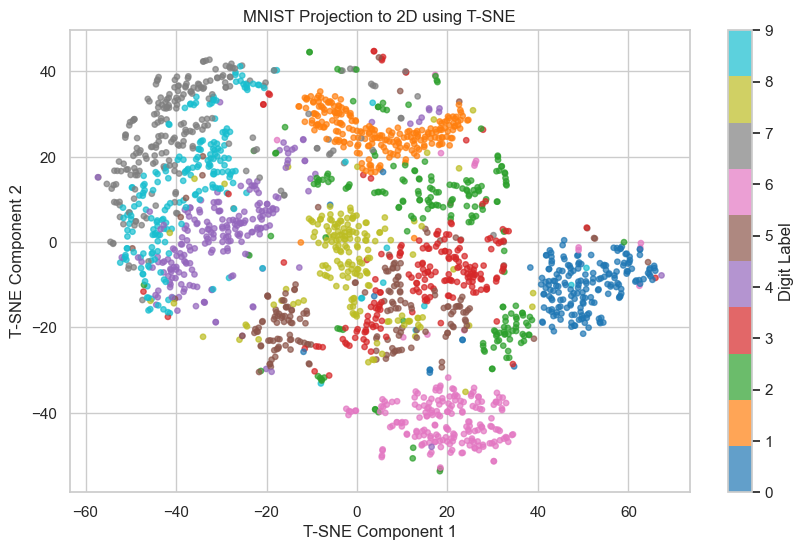

d:\anaconda3\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
d:\anaconda3\Lib\site-packages\umap\umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


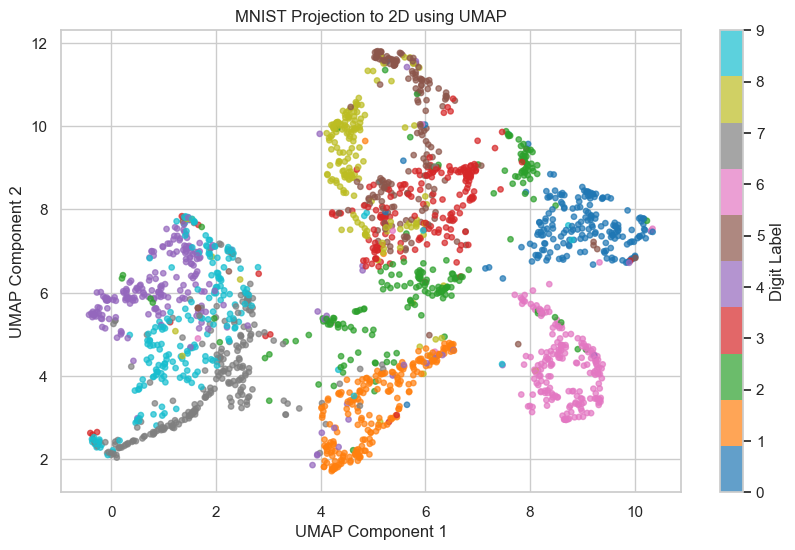

In [1]:
# Import required libraries
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
import umap
from sklearn.datasets import fetch_openml
from sklearn.preprocessing import StandardScaler

# Set seaborn style for cleaner plots
sns.set(style='whitegrid')

# -------------------------------
# Load the MNIST dataset
# -------------------------------
mnist = fetch_openml('mnist_784', version=1)
X, y = mnist.data, mnist.target.astype(int)

# Check the shape of the dataset
print(f"Original shape of data: {X.shape}")  # (70000, 784) -> 70000 samples, 784 features (28x28 pixels per image)

# Use a smaller subset of the data for faster computation
SAMPLE_SIZE = 2000
X_sample = X[:SAMPLE_SIZE]
y_sample = y[:SAMPLE_SIZE]

# Standardize the data (mean=0, variance=1) for better results in PCA and t-SNE
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_sample)

# -------------------------------
# 1. Heatmap of Correlation Matrix
# -------------------------------
# Calculate the correlation matrix
corr_matrix = np.corrcoef(X_scaled.T)

# Plot the heatmap of the correlation matrix
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, cmap='coolwarm', annot=False, fmt='.2f', linewidths=0.5)
plt.title("Heatmap of Correlation Matrix (Standardized MNIST Data)")
plt.xlabel("Feature Index")
plt.ylabel("Feature Index")
plt.show()

# -------------------------------
# 2. Dimensionality Reduction using PCA (Principal Component Analysis)
# -------------------------------
# PCA reduces the dimensionality of the data while retaining as much variance as possible
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# Print the explained variance ratio of each principal component
print(f"Explained variance ratio (PCA): {pca.explained_variance_ratio_}")

# Plot the PCA result
plt.figure(figsize=(10, 6))
scatter = plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y_sample, cmap='tab10', alpha=0.7, s=15)
plt.colorbar(scatter, label='Digit Label')
plt.title("MNIST Projection to 2D using PCA")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.grid(True)
plt.show()

# -------------------------------
# 3. Dimensionality Reduction using T-SNE (t-Distributed Stochastic Neighbor Embedding)
# -------------------------------
# T-SNE is more computationally expensive but helps in visualizing clusters in high-dimensional data
tsne = TSNE(n_components=2, perplexity=30, n_iter=1000, random_state=42)
X_tsne = tsne.fit_transform(X_scaled)

# Plot the T-SNE result
plt.figure(figsize=(10, 6))
scatter = plt.scatter(X_tsne[:, 0], X_tsne[:, 1], c=y_sample, cmap='tab10', alpha=0.7, s=15)
plt.colorbar(scatter, label='Digit Label')
plt.title("MNIST Projection to 2D using T-SNE")
plt.xlabel("T-SNE Component 1")
plt.ylabel("T-SNE Component 2")
plt.grid(True)
plt.show()

# -------------------------------
# 4. Dimensionality Reduction using UMAP (Uniform Manifold Approximation and Projection)
# -------------------------------
# UMAP is a non-linear dimensionality reduction technique similar to t-SNE but faster and more scalable
umap_model = umap.UMAP(n_components=2, random_state=42)
X_umap = umap_model.fit_transform(X_scaled)

# Plot the UMAP result
plt.figure(figsize=(10, 6))
scatter = plt.scatter(X_umap[:, 0], X_umap[:, 1], c=y_sample, cmap='tab10', alpha=0.7, s=15)
plt.colorbar(scatter, label='Digit Label')
plt.title("MNIST Projection to 2D using UMAP")
plt.xlabel("UMAP Component 1")
plt.ylabel("UMAP Component 2")
plt.grid(True)
plt.show()

# -------------------------------
# Conclusion
# -------------------------------
# By applying PCA, T-SNE, and UMAP, we can explore the MNIST dataset in 2D space.
# Each of these techniques has its own strengths and weaknesses:
# - PCA is a linear technique and preserves global variance.
# - T-SNE is better at capturing local structure but is computationally expensive.
# - UMAP is fast, scalable, and effective at preserving both local and global structure.


Original shape of data: (70000, 784)


d:\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2897: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
d:\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2898: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]


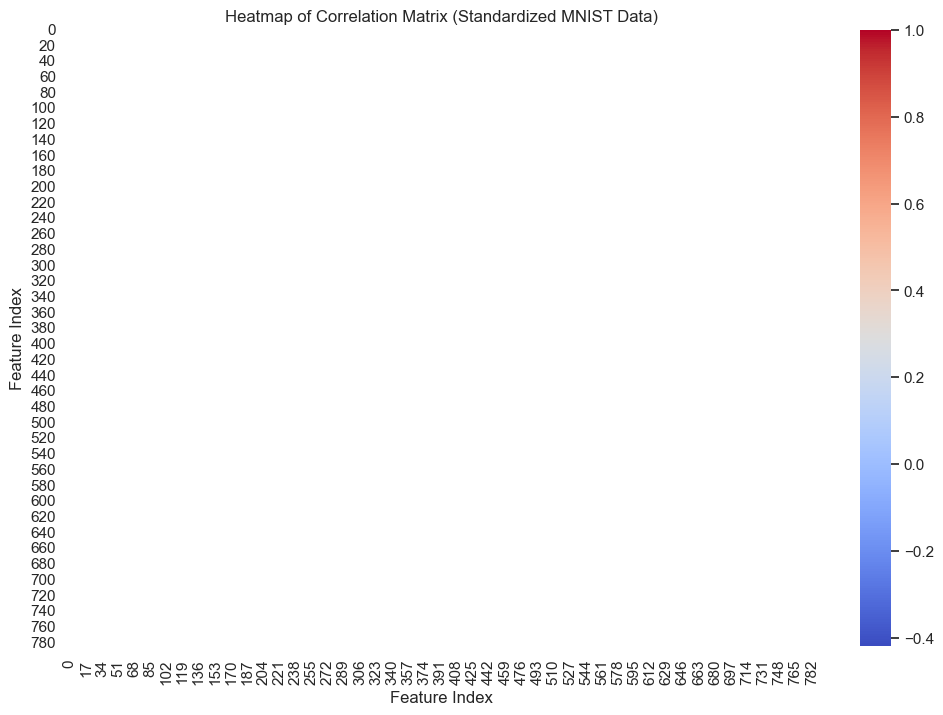

KeyError: 3

In [3]:
# Import required libraries
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import fetch_openml
from sklearn.preprocessing import StandardScaler

# Set seaborn style for cleaner plots
sns.set(style='whitegrid')

# -------------------------------
# Load the MNIST dataset
# -------------------------------
mnist = fetch_openml('mnist_784', version=1)
X, y = mnist.data, mnist.target.astype(int)

# Check the shape of the dataset
print(f"Original shape of data: {X.shape}")  # (70000, 784) -> 70000 samples, 784 features (28x28 pixels per image)

# Use a smaller subset of the data for faster computation
SAMPLE_SIZE = 2000
X_sample = X[:SAMPLE_SIZE]
y_sample = y[:SAMPLE_SIZE]

# Standardize the data (mean=0, variance=1) for better results in correlation calculations
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_sample)

# -------------------------------
# 1. Heatmap of Correlation Matrix
# -------------------------------
# Calculate the correlation matrix
corr_matrix = np.corrcoef(X_scaled.T)

# Plot the heatmap of the correlation matrix
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, cmap='coolwarm', annot=False, fmt='.2f', linewidths=0.5)
plt.title("Heatmap of Correlation Matrix (Standardized MNIST Data)")
plt.xlabel("Feature Index")
plt.ylabel("Feature Index")
plt.show()

# -------------------------------
# 2. Heatmap of a specific digit's pixel correlation (for visualization of features within one digit)
# -------------------------------
# Select a random digit (e.g., digit '1') from the dataset
# Ensure that there is at least one '1' in the dataset by checking the values of y_sample
digit_label = 1
digit_idx = np.where(y_sample == digit_label)[0]  # Get indices where the digit is '1'

if len(digit_idx) > 0:
    # Take the first occurrence of digit '1'
    X_digit = X_sample[digit_idx[0]].reshape(28, 28)  # Reshape the 1D data to a 28x28 image
    
    # Plot the heatmap of pixel correlations for a specific image (e.g., the first '1' in the dataset)
    plt.figure(figsize=(8, 6))
    sns.heatmap(X_digit, cmap='YlGnBu', annot=False, cbar=True, linewidths=0.5)
    plt.title(f"Heatmap of a Specific Digit (Digit '{digit_label}')")
    plt.xlabel("Pixel Index (Width)")
    plt.ylabel("Pixel Index (Height)")
    plt.show()
else:
    print(f"No occurrences of digit '{digit_label}' found in the sample.")
